# Pull REALTIME Cryptocurrency Prices

In [11]:
import json
import websocket
# websockets là một thư viện để xây dựng máy chủ và máy khách WebSocket bằng Python
import pandas as pd

In [12]:
assets = ['BTCUSDT','ETHUSDT','BNBUSDT','DOGEUSDT','PEPEUSDT','XRPUSDT','SOLUSDT','AVAXUSDT','SHIBUSDT','ADAUSDT']

In [13]:
assets = [coin.lower() + '@kline_1m' for coin in assets]
assets


['btcusdt@kline_1m',
 'ethusdt@kline_1m',
 'bnbusdt@kline_1m',
 'dogeusdt@kline_1m',
 'pepeusdt@kline_1m',
 'xrpusdt@kline_1m',
 'solusdt@kline_1m',
 'avaxusdt@kline_1m',
 'shibusdt@kline_1m',
 'adausdt@kline_1m']

In [14]:
assets = '/'.join(assets)
assets
# Split the string by slashes and filter out empty strings
parts = assets.split('/')
filtered_parts = [''.join(part.split('/')) for part in assets.split('///') if part]

# Replace the required parts to match the desired format
formatted_assets = [f"{pair}@kline_1m@kline_1m" for pair in filtered_parts]

# Join the results with ' / ' separator
result = '/'.join(formatted_assets)

print(result)

btcusdt@kline_1methusdt@kline_1mbnbusdt@kline_1mdogeusdt@kline_1mpepeusdt@kline_1mxrpusdt@kline_1msolusdt@kline_1mavaxusdt@kline_1mshibusdt@kline_1madausdt@kline_1m@kline_1m@kline_1m


In [15]:
def manipulation (source):
    rel_data = source['data']['k']['c']
    evt_time = pd.to_datetime(source['data']['E'],unit='ms')
    df = pd.DataFrame(rel_data, columns=[source['data']['s']], index=[evt_time])
    df.index.name = 'timestamp'
    df = df.astype(float)
    df = df.reset_index()
    print(df)
    return df


In [16]:
def on_message(ws, message): 
    global source
    source = message
    message = json.loads(message)
    manipulation(message)

In [11]:
source

NameError: name 'source' is not defined

# Cấu trúc dữ liệu:
stream: "bnbusdt@kline_1m"

Xác định luồng dữ liệu đang được truyền.
- "bnbusdt": Cặp giao dịch Binance Coin/USDT.
- "@kline_1m": Dữ liệu nến (candlestick) với khung thời gian 1 phút.
- data: Chứa dữ liệu cụ thể của nến.

# Chi tiết data:
## Thông tin chung của sự kiện
e: 'kline'
- Loại sự kiện, ở đây là dữ liệu nến (candlestick).

E: 1733997068108
- Thời gian sự kiện được gửi đi (epoch time tính bằng millisecond).

s: 'BNBUSDT'
- Cặp giao dịch (Binance Coin so với USDT).

# Thông tin nến (k):
t: 1733997060000
- Thời điểm bắt đầu của nến (epoch time tính bằng millisecond).

T: 1733997119999
- Thời điểm kết thúc của nến (epoch time tính bằng millisecond).

s: 'BNBUSDT'
- Cặp giao dịch (lặp lại thông tin từ trước).

i: '1m'
- Khung thời gian của nến (1 phút).

f: 891342969
- ID của giao dịch đầu tiên trong nến.

L: 891343185
- ID của giao dịch cuối cùng trong nến.

o: '724.82000000'
- Giá mở cửa (open price) của nến.

c: '724.55000000'
- Giá đóng cửa (close price) của nến.

h: '724.83000000'
- Giá cao nhất (high price) của nến.

l: '724.55000000'
- Giá thấp nhất (low price) của nến.

v: '27.51800000'
- Khối lượng giao dịch (volume) trong nến (số lượng BNB được giao dịch).

n: 217
- Số lượng giao dịch (number of trades) diễn ra trong nến.

# x: False: 
Cờ đánh dấu liệu nến đã đóng hay chưa:
True: Nến đã đóng.
False: Nến vẫn đang hình thành.

q: '19941.75665000'
- Khối lượng giao dịch (volume) tính theo đồng quote (USDT).

V: '16.51100000'
- Khối lượng giao dịch của các lệnh mua vào (tính theo đồng BNB).

Q: '11965.17897000'
- Khối lượng giao dịch của các lệnh mua vào (tính theo đồng quote - USDT).

B: '0'
- Giá trị "Best bid volume" tại thời điểm đó.


In [17]:
socket = "wss://stream.binance.com:9443/stream?streams=" + assets
socket

'wss://stream.binance.com:9443/stream?streams=btcusdt@kline_1m/ethusdt@kline_1m/bnbusdt@kline_1m/dogeusdt@kline_1m/pepeusdt@kline_1m/xrpusdt@kline_1m/solusdt@kline_1m/avaxusdt@kline_1m/shibusdt@kline_1m/adausdt@kline_1m'

In [18]:
ws = websocket.WebSocketApp(socket, on_message=on_message) 
# Đây là một lớp trong thư viện websocket-client dùng để quản lý kết nối WebSocket.
# Nó cho phép thiết lập kết nối và định nghĩa các hành vi cho các sự kiện như nhận tin nhắn (on_message), kết nối thành công (on_open), hoặc xảy ra lỗi (on_error).
ws.run_forever()

                timestamp  AVAXUSDT
0 2025-03-05 13:29:17.084     20.97
                timestamp  BTCUSDT
0 2025-03-05 13:29:18.017  89763.7
                timestamp  ETHUSDT
0 2025-03-05 13:29:18.017  2211.44
                timestamp  BNBUSDT
0 2025-03-05 13:29:18.123   596.79
                timestamp  PEPEUSDT
0 2025-03-05 13:29:18.247  0.000007
                timestamp  ADAUSDT
0 2025-03-05 13:29:18.309   0.9802
                timestamp  XRPUSDT
0 2025-03-05 13:29:18.319   2.4872
                timestamp  DOGEUSDT
0 2025-03-05 13:29:18.592   0.20234
                timestamp  SOLUSDT
0 2025-03-05 13:29:18.809   145.08


True

# Filter Data datetime and export file .csv

pip install requests pandas pandas-ta numpy

In [21]:
import requests
import pandas as pd
import time

# Define the assets
assets = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT', 'PEPEUSDT', 
          'XRPUSDT', 'SOLUSDT', 'AVAXUSDT', 'SHIBUSDT', 'ADAUSDT']

# Define the date range (UNIX timestamps in milliseconds)
start_date = int(pd.Timestamp("2024-01-01").timestamp() * 1000)
end_date = int(pd.Timestamp("2024-12-12").timestamp() * 1000)

# Function to fetch kline data from Binance API
def fetch_kline_data(symbol, interval='5m', start_time=None, end_time=None):
    base_url = "https://api.binance.com/api/v3/klines"
    params = {
        "symbol": symbol,
        "interval": interval,
        "startTime": start_time,
        "endTime": end_time,
        "limit": 1000  # Maximum records per request
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for {symbol}: {response.status_code}")
        return []

# Fetch data for all assets within the date range
all_data = []
for asset in assets:
    print(f"Fetching data for {asset}...")
    current_start = start_date
    while current_start < end_date:
        klines = fetch_kline_data(asset, start_time=current_start, end_time=end_date)
        if not klines:
            break
        for kline in klines:
            all_data.append({
                "symbol": asset,
                "timestamp": pd.to_datetime(kline[0], unit='ms'),
                "open": float(kline[1]),
                "high": float(kline[2]),
                "low": float(kline[3]),
                "close": float(kline[4]),
                "volume": float(kline[5]),
                # "Number of trades": float(kline[6]),
                # "Taker buy base asset volume": float(kline[7])
            })
        current_start = klines[-1][0] + 1  # Move to the next time window
        time.sleep(0.2)  # Avoid hitting rate limits

# Convert to DataFrame
df = pd.DataFrame(all_data)

# Filter the DataFrame by the date range (if needed for validation)
df = df[(df['timestamp'] >= "2024-09-01") & (df['timestamp'] <= "2024-12-12")]


Fetching data for BTCUSDT...
Fetching data for ETHUSDT...
Fetching data for BNBUSDT...
Fetching data for DOGEUSDT...
Fetching data for PEPEUSDT...
Fetching data for XRPUSDT...
Fetching data for SOLUSDT...
Fetching data for AVAXUSDT...
Fetching data for SHIBUSDT...
Fetching data for ADAUSDT...


In [ ]:
# Lưu dữ liệu thành 10 tệp CSV riêng biệt
for asset in assets:
    df_asset = df[df["symbol"] == asset]
    file_name = f"{asset}.csv"
    df_asset.to_csv(file_name, index=False)
    print(f"Đã lưu {file_name}")

## Compute Technical Indicators

How to install Tablib

step 1: Download TA-Lib C Library (Windows) - https://github.com/cgohlke/talib-build/releases

step 2: Using Command: pip install C:\Users\Admin\Downloads\ta_lib-0.6.3-cp312-cp312-win_amd64.whl (Choose your dir)

Note: I use Python 3.12 so if you are using another version of Python, please ask AI to find your suitable Tablib version for your Python.

pip install pandas numpy mplfinance 

In [ ]:
# import pandas as pd
# import mplfinance as mpf
# import os
# import matplotlib.pyplot as plt
# import talib

# # Đọc dữ liệu từ file BTCUSDT.csv
# file_path = "BTCUSDT.csv"
# df = pd.read_csv(file_path)

# # Chuyển đổi timestamp nếu cần thiết
# if 'timestamp' in df.columns:
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     df.set_index('timestamp', inplace=True)

# # Đổi tên cột nếu cần (trường hợp cột có chữ hoa/chữ thường không đồng nhất)
# df.columns = df.columns.str.lower()

# # Kiểm tra các cột cần thiết
# required_columns = ['open', 'high', 'low', 'close', 'volume']
# missing_columns = [col for col in required_columns if col not in df.columns]
# if missing_columns:
#     raise ValueError(f"Các cột bị thiếu trong dữ liệu: {missing_columns}")

# # Tạo thư mục lưu dataset hình ảnh
# image_folder = "crypto_chart_patterns"
# os.makedirs(image_folder, exist_ok=True)

# # Số lượng mẫu cần lấy để tạo hình ảnh
# window_size = 50  # số lượng nến trên mỗi hình

# # Danh sách lưu đường dẫn hình ảnh
# image_paths = []

# # Chia dữ liệu thành các cửa sổ nhỏ để tạo hình ảnh
# for i in range(len(df) - window_size):
#     subset = df.iloc[i:i+window_size]

#     # Vẽ biểu đồ nến
#     fig, ax = mpf.plot(subset, type='candle', style='charles', returnfig=True)
    
#     # Lưu hình ảnh
#     img_name = f"{image_folder}/chart_{i}.png"
#     fig.savefig(img_name)
#     plt.close(fig)
#     image_paths.append(img_name)

# # Hiển thị kết quả
# image_folder


In [101]:
import pandas as pd
import mplfinance as mpf
import os
import matplotlib.pyplot as plt
import gc  # Garbage Collector để giải phóng bộ nhớ

# Đọc dữ liệu từ file BTCUSDT.csv
file_path = "ADAUSDT.csv"
df = pd.read_csv(file_path)

# Chuyển đổi timestamp nếu cần thiết
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

# Đổi tên cột nếu cần (trường hợp cột có chữ hoa/chữ thường không đồng nhất)
df.columns = df.columns.str.lower()

# Kiểm tra các cột cần thiết
required_columns = ['open', 'high', 'low', 'close', 'volume']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Các cột bị thiếu trong dữ liệu: {missing_columns}")

# Tạo thư mục lưu dataset hình ảnh
image_folder = "crypto_chart_patterns_ADA"
os.makedirs(image_folder, exist_ok=True)

# Giảm kích thước dataset để tránh lỗi bộ nhớ
window_size = 30  # Giảm số lượng nến trên mỗi hình

# Danh sách lưu đường dẫn hình ảnh
image_paths = []

# Chia dữ liệu thành các cửa sổ nhỏ để tạo hình ảnh
for i in range(0, len(df) - window_size, 10):  # Bỏ qua mỗi 10 bước để giảm số lượng ảnh tạo ra
    subset = df.iloc[i:i+window_size]

    # Vẽ biểu đồ nến
    fig, ax = mpf.plot(subset, type='candle', style='charles', returnfig=True)

    # Lưu hình ảnh
    img_name = f"{image_folder}/chart_{i}.png"
    fig.savefig(img_name)
    plt.close(fig)  # Giải phóng bộ nhớ sau khi lưu ảnh
    gc.collect()  # Gọi garbage collector để giải phóng bộ nhớ

    image_paths.append(img_name)

print(f"Đã tạo {len(image_paths)} hình ảnh tại {image_folder}")


Đã tạo 2935 hình ảnh tại crypto_chart_patterns_ADA


## Detect Candlestick Patterns by using Talib

Cách hoạt động của TA-Lib trong phát hiện Candlestick Patterns

TA-Lib trả về giá trị 0, 100, hoặc -100:

100: Mô hình xuất hiện và có xu hướng tăng giá.

-100: Mô hình xuất hiện và có xu hướng giảm giá.

0: Không có mô hình nào xuất hiện.

Sử dụng dữ liệu giao dịch từ BTCUSDT.csv và các hàm TA‑Lib để phát hiện các mẫu nến (candlestick patterns). Sau đó, ánh xạ khoảng dữ liệu tương ứng với mỗi hình ảnh được tạo ra từ thư mục crypto_chart_patterns và gán nhãn cho từng ảnh vào file CSV (crypto_chart_patterns_labels.csv).

Quy trình thực hiện:

- Đọc dữ liệu và xử lý (timestamp, lowercase các cột).

- Sử dụng TA‑Lib để phát hiện các mẫu nến và thêm kết quả vào DataFrame.

- Lấy danh sách các hình ảnh đã tạo và sắp xếp chúng theo thứ tự.

- Với mỗi hình ảnh, xác định subset dữ liệu tương ứng dựa trên window_size và bước nhảy.

- Quét qua subset để phát hiện các mẫu nến, gộp các nhãn lại hoặc gán "No Pattern" nếu không tìm thấy mẫu nào.

- Ghi thông tin ảnh và nhãn vào file CSV để làm dataset nhãn cho quá trình huấn luyện mô hình sau này.

## Sort lại hình ảnh khi lưu trong file csv.

- Hiện tượng này xảy ra do sorted() trong Python đang sắp xếp tên file theo thứ tự từ điển (lexicographical) thay vì theo giá trị số. Kết quả là "chart_100.png" được coi là nhỏ hơn "chart_2.png" vì "1" < "2" khi so sánh chuỗi.

In [118]:
import talib
import pandas as pd
import os
import re

# 1) Đọc dữ liệu CSV gốc
file_path = "ADAUSDT.csv"
df = pd.read_csv(file_path)

# 2) Chuyển đổi timestamp nếu cần
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

df.columns = df.columns.str.lower()

# 3) Phát hiện các Candlestick Patterns bằng TA-Lib
patterns = {
    # Bullish Reversal
    # "Inverted_Hammer": talib.CDLINVERTEDHAMMER(df["open"], df["high"], df["low"], df["close"]),
    # "Morning_Star": talib.CDLMORNINGSTAR(df["open"], df["high"], df["low"], df["close"]),
    "Bullish_Engulfing": talib.CDLENGULFING(df["open"], df["high"], df["low"], df["close"]),
    # Bearish Reversal
    # "Shooting_Star": talib.CDLSHOOTINGSTAR(df["open"], df["high"], df["low"], df["close"]),
    # "Evening_Star": talib.CDLEVENINGSTAR(df["open"], df["high"], df["low"], df["close"]),
    "Bearish_Engulfing": -talib.CDLENGULFING(df["open"], df["high"], df["low"], df["close"]),
    # Additional Patterns (bạn có thể bật lại nếu cần)
    "Doji": talib.CDLDOJI(df["open"], df["high"], df["low"], df["close"]),
    "Harami": talib.CDLHARAMI(df["open"], df["high"], df["low"], df["close"]),
    # "Hammer": talib.CDLHAMMER(df["open"], df["high"], df["low"], df["close"]),
}

for pattern, values in patterns.items():
    df[pattern] = values

# 4) Lấy danh sách file ảnh (chưa sorted)
image_folder = "crypto_chart_patterns_ADA"
image_files = os.listdir(image_folder)

# 5) Tạo file nhãn (CSV) - CHƯA SẮP XẾP TÊN FILE
label_file = "crypto_chart_patterns_labels_ADA.csv"
with open(label_file, "w") as f:
    f.write("image_name,label\n")
    for i, img_name in enumerate(image_files):
        start_idx = i * 10
        if start_idx >= len(df):
            break
        subset = df.iloc[start_idx:start_idx + 30]

        detected_labels = set()
        for _, row in subset.iterrows():
            for pattern in patterns.keys():
                if row[pattern] != 0:
                    detected_labels.add(pattern)

        # Nếu không phát hiện được pattern nào, bỏ qua mẫu này (không ghi "No Pattern")
        if not detected_labels:
            continue

        label_str = "|".join(detected_labels)
        f.write(f"{image_folder}/{img_name},{label_str}\n")

print(f"Đã tạo file nhãn dataset: {label_file}")

# ----------------------------------------------------------
# 6) ĐỌC LẠI FILE CSV VÀ SẮP XẾP THEO SỐ TRONG TÊN FILE
# ----------------------------------------------------------

# Hàm tách số ra từ tên file, ví dụ: "chart_123.png" -> 123
def extract_number_from_path(path):
    match = re.search(r'chart_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Đọc lại file CSV vào DataFrame
labels_df = pd.read_csv(label_file)

# Tạo cột tạm "sort_key" để sắp xếp
labels_df['sort_key'] = labels_df['image_name'].apply(extract_number_from_path)

# Sắp xếp theo "sort_key" và xóa cột tạm
labels_df = labels_df.sort_values('sort_key').drop(columns='sort_key')

# Ghi đè lại file CSV đã được sắp xếp
labels_df.to_csv(label_file, index=False)

# Kiểm tra vài dòng đầu sau khi sắp xếp
print(labels_df.head(10))


Đã tạo file nhãn dataset: crypto_chart_patterns_labels_ADA.csv
                                  image_name  \
0      crypto_chart_patterns_ADA/chart_0.png   
1     crypto_chart_patterns_ADA/chart_10.png   
1112  crypto_chart_patterns_ADA/chart_20.png   
2158  crypto_chart_patterns_ADA/chart_30.png   
2269  crypto_chart_patterns_ADA/chart_40.png   
2380  crypto_chart_patterns_ADA/chart_50.png   
2491  crypto_chart_patterns_ADA/chart_60.png   
2602  crypto_chart_patterns_ADA/chart_70.png   
2713  crypto_chart_patterns_ADA/chart_80.png   
2824  crypto_chart_patterns_ADA/chart_90.png   

                                                label  
0          Bearish_Engulfing|Harami|Bullish_Engulfing  
1     Bearish_Engulfing|Harami|Bullish_Engulfing|Doji  
1112  Bearish_Engulfing|Harami|Bullish_Engulfing|Doji  
2158  Bearish_Engulfing|Harami|Bullish_Engulfing|Doji  
2269  Bearish_Engulfing|Harami|Bullish_Engulfing|Doji  
2380  Bearish_Engulfing|Harami|Bullish_Engulfing|Doji  
2491  Bearish_En

In [116]:
import pandas as pd

# Đọc file CSV chứa nhãn
label_file = "crypto_chart_patterns_labels_BNB.csv"
df = pd.read_csv(label_file)

# Tạo dictionary để đếm số lần xuất hiện của mỗi pattern
pattern_counts = {}

for label_str in df["label"]:
    # Nếu nhãn là "No Pattern", ta vẫn đếm
    patterns = label_str.split('|')
    for p in patterns:
        pattern_counts[p] = pattern_counts.get(p, 0) + 1

# In ra số lần xuất hiện của mỗi pattern
for pattern, count in pattern_counts.items():
    print(f"{pattern}: {count}")

# Tổng số pattern duy nhất
print("Tổng số pattern duy nhất:", len(pattern_counts))


Bearish_Engulfing: 2928
Harami: 2842
Bullish_Engulfing: 2928
Doji: 2860
Tổng số pattern duy nhất: 4


- Merged 2 files for multiple-lable

In [117]:
import pandas as pd

# Đọc tệp CSV cho BTC và BNB
df_btc = pd.read_csv("crypto_chart_patterns_labels_BTC.csv")
df_bnb = pd.read_csv("crypto_chart_patterns_labels_BNB.csv")

# Hợp nhất hai DataFrame lại với nhau
df_merged = pd.concat([df_btc, df_bnb], ignore_index=True)

# Lưu kết quả vào file CSV mới
merged_file = "crypto_chart_patterns_labels_merged.csv"
df_merged.to_csv(merged_file, index=False)

print(f"Đã merge và lưu kết quả vào {merged_file}")


Đã merge và lưu kết quả vào crypto_chart_patterns_labels_merged.csv


In [109]:
import pandas as pd

# Đọc file CSV chứa nhãn
label_file = "crypto_chart_patterns_labels_merged_1.csv"
df = pd.read_csv(label_file)

# Tạo dictionary để đếm số lần xuất hiện của mỗi pattern
pattern_counts = {}

for label_str in df["label"]:
    # Nếu nhãn là "No Pattern", ta vẫn đếm
    patterns = label_str.split('|')
    for p in patterns:
        pattern_counts[p] = pattern_counts.get(p, 0) + 1

# In ra số lần xuất hiện của mỗi pattern
for pattern, count in pattern_counts.items():
    print(f"{pattern}: {count}")

# Tổng số pattern duy nhất
print("Tổng số pattern duy nhất:", len(pattern_counts))


Bullish_Engulfing: 5861
Doji: 5731
Bearish_Engulfing: 5861
Hammer: 5160
Harami: 5680
Tổng số pattern duy nhất: 5


# Undersampling (giảm số mẫu)

- Cho các nhãn bị chiếm ưu thế, sao cho mỗi nhãn trong danh sách các majority label (No Pattern, Bullish_Engulfing, Doji, Bearish_Engulfing, Hammer, Harami) chỉ còn khoảng 500–600 mẫu.

In [92]:
import pandas as pd

# Đọc lại file CSV đã merge (hoặc file CSV ban đầu nếu có)
df_labels = pd.read_csv("crypto_chart_patterns_labels_merged.csv")

# Danh sách các majority label cần giảm số mẫu
majority_labels = ["Bullish_Engulfing", "Doji", "Bearish_Engulfing", "Hammer", "Harami"]

# Mục tiêu: mỗi majority label chỉ còn khoảng 600 mẫu (có thể thay đổi target_count)
target_count = 500

# Tạo danh sách các DataFrame sau khi downsample cho mỗi majority label
downsampled_list = []

for label in majority_labels:
    subset = df_labels[df_labels['label'].str.contains(label)]
    count = len(subset)
    print(f"{label}: {count} mẫu")
    if count > target_count:
        subset_downsampled = subset.sample(n=target_count, random_state=42)
        downsampled_list.append(subset_downsampled)
    else:
        downsampled_list.append(subset)

# Lấy các mẫu không chứa bất kỳ majority label nào
others = df_labels[~df_labels['label'].str.contains("|".join(majority_labels))]
print(f"Các mẫu không chứa majority label: {len(others)}")

# Kết hợp lại các mẫu downsample và các mẫu khác
balanced_df = pd.concat(downsampled_list + [others]).drop_duplicates()

# Kiểm tra lại số lượng mẫu sau khi cân bằng cho từng nhãn
print("Tổng số mẫu sau downsampling:", len(balanced_df))
for label in majority_labels:
    count_label = balanced_df['label'].str.contains(label).sum()
    print(f"{label}: {count_label} mẫu")

# Lưu kết quả vào file CSV mới
balanced_df.to_csv("crypto_chart_patterns_labels_balanced.csv", index=False)
print("Đã lưu file CSV balanced.")


Bullish_Engulfing: 2933 mẫu
Doji: 2871 mẫu
Bearish_Engulfing: 2933 mẫu
Hammer: 2421 mẫu
Harami: 2838 mẫu
Các mẫu không chứa majority label: 604
Tổng số mẫu sau downsampling: 2171
Bullish_Engulfing: 1505 mẫu
Doji: 1485 mẫu
Bearish_Engulfing: 1505 mẫu
Hammer: 1217 mẫu
Harami: 1463 mẫu
Đã lưu file CSV balanced.


In [93]:
import pandas as pd

# Đọc file CSV chứa nhãn
label_file = "crypto_chart_patterns_labels_balanced.csv"
df = pd.read_csv(label_file)

# Tạo dictionary để đếm số lần xuất hiện của mỗi pattern
pattern_counts = {}

for label_str in df["label"]:
    # Nếu nhãn là "No Pattern", ta vẫn đếm
    patterns = label_str.split('|')
    for p in patterns:
        pattern_counts[p] = pattern_counts.get(p, 0) + 1

# In ra số lần xuất hiện của mỗi pattern
for pattern, count in pattern_counts.items():
    print(f"{pattern}: {count}")

# Tổng số pattern duy nhất
print("Tổng số pattern duy nhất:", len(pattern_counts))


Bullish_Engulfing: 1505
Doji: 1485
Bearish_Engulfing: 1505
Hammer: 1093
Harami: 1463
Inverted_Hammer: 286
Morning_Star: 267
Shooting_Star: 550
Evening_Star: 298
Tổng số pattern duy nhất: 9


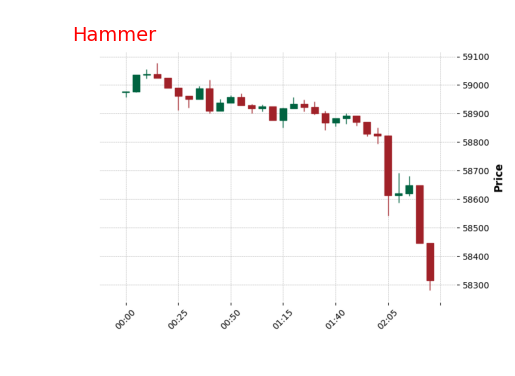

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Đường dẫn tới ảnh
image_path = "crypto_chart_patterns/chart_0.png"

# Mở ảnh bằng matplotlib
img = mpimg.imread(image_path)
fig, ax = plt.subplots()

# Hiển thị ảnh
ax.imshow(img)

# Giả sử bạn muốn viết chữ "Hammer" tại tọa độ (x=100, y=50) trên ảnh
ax.text(100, 50, "Hammer", color='red', fontsize=14, backgroundcolor='white')

# Lưu lại ảnh đã được “dán nhãn”
plt.axis('off')  # Ẩn trục
plt.savefig("chart_1_labeled.png", bbox_inches='tight')
plt.show()


# Using PostgreSQL for storing data

## Bước 1: Cài đặt thư viện cần thiết

pip install psycopg2-binary sqlalchemy pandas

## Bước 2: Kết nối tới PostgreSQL và tạo bảng

In [9]:
import psycopg2

# Kết nối đến PostgreSQL
conn = psycopg2.connect(
    dbname="cryptocurrency",     # Tên cơ sở dữ liệu
    user="postgres",           # Tên người dùng
    password="admin",   # Mật khẩu
    host="localhost",           # Địa chỉ host
    port="5432"                 # Cổng (mặc định là 5432)
)

# Tạo con trỏ (cursor)
cur = conn.cursor()

# # Tạo bảng (nếu chưa có)
# create_table_query = """
# CREATE TABLE IF NOT EXISTS cryptocurrency_prediction.crypto_data (
#     symbol VARCHAR(20),
#     timestamp BIGINT PRIMARY KEY,
#     open DECIMAL(18, 8),
#     high DECIMAL(18, 8),
#     low DECIMAL(18, 8),
#     close DECIMAL(18, 8),
#     volume DECIMAL(18, 8)
# );
# """
# cur.execute(create_table_query)

# Commit thay đổi và đóng kết nối
conn.commit()
cur.close()
conn.close()


## Bước 3: Đọc dữ liệu từ file .csv và chèn vào PostgreSQL

In [11]:
import pandas as pd
import psycopg2

# Đọc dữ liệu từ file .csv
df = pd.read_csv('BTCUSDT.csv')

# Chuyển đổi cột 'timestamp' thành định dạng Unix timestamp (số giây kể từ 1970-01-01)
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) / 10**9  # Chuyển sang số giây

# Kết nối đến PostgreSQL
conn = psycopg2.connect(
    dbname="cryptocurrency",     # Tên cơ sở dữ liệu
    user="postgres",             # Tên người dùng
    password="admin",            # Mật khẩu
    host="localhost",            # Địa chỉ host
    port="5432"                  # Cổng (mặc định là 5432)
)

# Tạo con trỏ (cursor)
cur = conn.cursor()

# Đẩy dữ liệu vào bảng
for index, row in df.iterrows():
    # Chèn dữ liệu vào bảng
    insert_query = """
    INSERT INTO cryptocurrency_prediction.crypto_data (symbol, timestamp, open, high, low, close, volume)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
    """
    cur.execute(insert_query, (row['symbol'], int(row['timestamp']), row['open'], row['high'], row['low'], row['close'], row['volume']))

# Commit và đóng kết nối
conn.commit()
cur.close()
conn.close()

print("Dữ liệu đã được chèn thành công.")


Dữ liệu đã được chèn thành công.


## Bước 4: Kiểm tra dữ liệu đã chèn thành công

SELECT * FROM cryptocurrency_prediction.crypto_data;